In [9]:
from modsim import *
%matplotlib inline
import matplotlib.pyplot as plt



http://www.pveducation.org/pvcdrom/2-properties-sunlight/solar-radiation-space

In [10]:
degrees= UNITS.degrees

In [58]:
mkm= 1/1000

sechour= (1/60)**2 

mass_sun= 1.989e30 
G= 6.673e-11 * mkm**3 
mass_toast= .5
S_B_const= 5.67e-8 
temp_S= 5772 
area_t= .01 *mkm**2
r_s= 695770 *1000 *mkm
Pow_s= 3.9e26 
Q_b= .008/273 




num_G = G* mass_sun   

num_G

dist_init= 1e10

VXinit= sqrt(2*num_G/dist_init)

VXinit


 

#I think these are all the equations and constants we need. I found a specific heat for bread that was in kg and C, 
#which I think I converted into Kelvin but it's a bit sketchy. I'm also not sure about the area of the sunward facing 
#toast side, but we can look back at that. 

5.1522028298583118

In [177]:

condition= Condition(x0= 0, y0= -1e10, velocity= 5, angle = 0*degrees, duration= 1e8, T0= 0 )

In [178]:
#I'm not sure I'm doing this right, I'm mostly copying this from chapter 10 with the intro to vectors and the baseball. 

def make_system(condition):
    unpack(condition)
    
    theta = np.deg2rad(angle)
    
    
    
    vx, vy = pol2cart(theta, velocity)
    
    init= State(x=x0, y=y0, vx= vx, vy= vy)
    area_toast = area_t 
    
    ts= linspace(0, duration, 100)
    
    return System(init= init, mass= mass_toast, area_t= area_t, T= T0, Q_b= Q_b, ts= ts)

system= make_system(condition) 




In [179]:
def slope_func(state, t, system):
    x, y, vx, vy = state
    
    unpack(system)
    dist= sqrt(x**2+y**2)
    P= Vector(-x, -y) 
    V= Vector(vx, vy) 
    tan_vect= Vector((-y/ dist), (x/ dist))
    
    xdir= P.x/ dist
    ydir= P.y/dist
    w= V.proj(tan_vect)/ tan_vect.mag 
    wx=w.x
    wy=w.y
    #print(w)

    F_grav= G* mass_sun *mass_toast/ dist**2
    
    a_grav= Vector(xdir, ydir) *((F_grav)/mass_toast) 
    a_cent= Vector(-xd, y/dist) *(w.mag**2)/dist
    
    #print(a_cent)
    ax= a_grav.x + a_cent.x
    ay= a_grav.y + a_cent.y
    
    
    rad_on_toast= t * Pow_s * r_s**2/ P.mag**2 
    temp_toast= rad_on_toast/ Q_b / mass_toast 
    
    
    return vx, vy, ax, ay
    
    
                     
    
    
slope_func(system.init,1,system)
    

(<Quantity(5.0, 'dimensionless')>,
 <Quantity(0.0, 'dimensionless')>,
 <Quantity(0.0, 'dimensionless')>,
 <Quantity(-1.1727403000000001e-09, 'dimensionless')>)

In [180]:

run_odeint(system, slope_func)

In [181]:
system.results

,x,y,vx,vy
0.000000e+00,0.000000e+00,-1.000000e+10,5.000000,0.000000
1.010101e+06,5.050505e+06,-1.000000e+10,5.000000,-0.001185
2.020202e+06,1.010101e+07,-1.000000e+10,5.000001,-0.002369
3.030303e+06,1.515152e+07,-1.000001e+10,5.000003,-0.003554
4.040404e+06,2.020203e+07,-1.000001e+10,5.000005,-0.004738
5.050505e+06,2.525254e+07,-1.000002e+10,5.000008,-0.005923
6.060606e+06,3.030305e+07,-1.000002e+10,5.000011,-0.007107
7.070707e+06,3.535357e+07,-1.000003e+10,5.000015,-0.008292
8.080808e+06,4.040409e+07,-1.000004e+10,5.000019,-0.009477
9.090909e+06,4.545462e+07,-1.000005e+10,5.000024,-0.010661


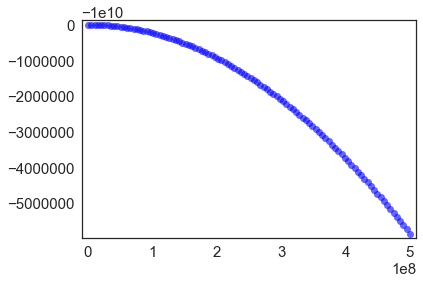

In [182]:
plot(system.results.x, system.results.y, "bo")
#plt.axis([-6e10, 6e10, -1.2e10, 1.2e10])

In [174]:
A= Vector(1, 3)

B= Vector(2, -6)

A.proj(B.hat())

<Quantity([-0.8  2.4], 'dimensionless')>